In [1]:

import os
assert 'THEANO_FLAGS' in os.environ
# switch to cpu
#os.environ['THEANO_FLAGS'] = 'floatX=float32,device=cpu,nvcc.fastmath=True'

import numpy as np
import datetime as dt
import scipy
import joblib
import matplotlib.pyplot as plt
import matplotlib as mpl
import convvisual.analysis.analysis as anal
import convvisual.analysis.plot_new as plot
import convvisual.receptive_field.receptive_field as rf
import convvisual.analysis.utils as ut
import convvisual.analysis.data_preparation as dp
import convvisual.receptive_field as crf
import scipy

from braindecode.veganlasagne.layers import create_pred_fn

import lasagne

%load_ext autoreload
%autoreload 2

import seaborn as sns
sns.set_context("paper")
#sns.set(font_scale=1.08)

Using gpu device 0: GeForce GTX TITAN X (CNMeM is disabled, cuDNN 5005)
/home/hartmank/braindecode/vienv/local/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
subject=22
modelpath = '/home/hartmank/braindecode/data/models/'
modelname = 'paper/ours/cnt/deep4/car/%d'%subject
savepath  = '/home/hartmank/data/convvisual/RF_data_paper/'
folder = 'FilterAnalysis_nUnits100'
datapath = os.path.join(savepath,modelname,folder)
figurepath = os.path.join(savepath,'figures','%d'%subject,folder)

In [3]:
misc = dp.load_misc_data(datapath)

In [4]:
sensor_names = misc['sensor_names']
model = misc['model']
model = lasagne.layers.get_all_layers(model)

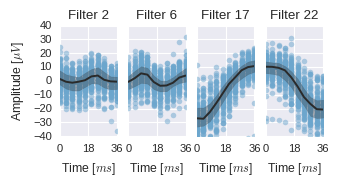

In [10]:
layer_ind = 4
filter_inds = [2,6,17,22]

f,axes = plt.subplots(ncols=4,nrows=1,sharey=True,figsize=(3.5,2))
axes = np.array(axes).flatten()
label_data = dp.load_labels_data(datapath,layer_ind)
F_baseline = dp.load_baseline_feature_data(datapath,layer_ind)
feature_entries_f = ut.create_flattened_featurearr(F_baseline['feature_labels'])
for i,filter_ind in enumerate(filter_inds):
    X_RF = dp.load_RF_data(datapath,layer_ind,None,filter_ind)['X_RF_cropped']
    KS = dp.load_KS_score_data(datapath,layer_ind,None,filter_ind)
    KS_f = ut.create_flattened_featurearr([KS['FFT']['KS_kuiper'],
                                          KS['FFTc']['KS_kuiper'],
                                          KS['Phase']['KS_kuiper'],
                                          KS['Phasec']['KS_kuiper'],
                                          KS['Mean']['KS_kuiper'],
                                          KS['Meanc']['KS_kuiper'],])
    KS_max_ind = np.argmax(KS_f)
    sensor_ind = feature_entries_f[KS_max_ind][1][0]
    X_median = np.median(X_RF[:,sensor_ind],axis=0)
    p25 = np.percentile(X_RF[:,sensor_ind],25,axis=0)
    p75 = np.percentile(X_RF[:,sensor_ind],75,axis=0)
    
    plt.sca(axes[i])
    sns.tsplot(X_RF[:,sensor_ind,:],err_style='unit_points',color=['#6CA6CD'])
    plt.plot(X_median,color='#2a2a2a',zorder=101)
    plt.fill_between(np.arange(len(p25)), p25, p75,color='#2a2a2a',zorder=100,alpha=0.3)
    plt.ylim(-40,40)
    plt.title('Filter %d'%filter_ind)
    plt.xticks([0,4.5,9],(np.array([0,4.5,9])/250.*1000).astype(int))
    if i%5==0:
        plt.ylabel('Amplitude [${\mu}V$]')
    plt.xlabel('Time [$ms$]')
plt.tight_layout()
plt.subplots_adjust(wspace=0.2)
plt.savefig('results_l2.png',bbox_inches='tight',pad_inches=0)
plt.show()
    

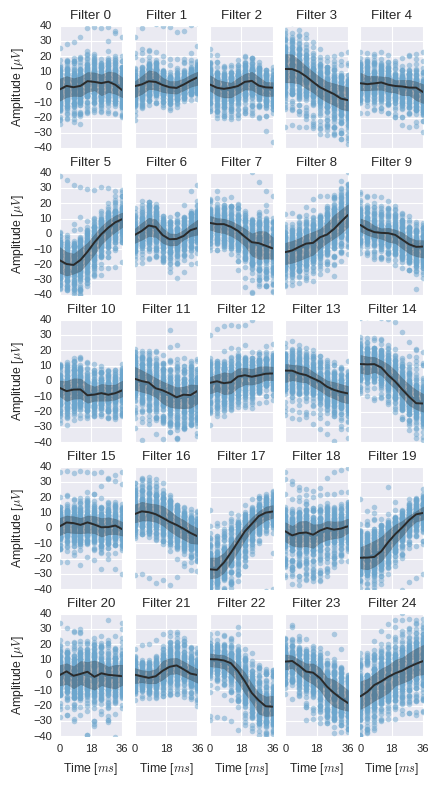

In [11]:
layer_ind = 4
filter_inds = np.arange(25)

f,axes = plt.subplots(ncols=5,nrows=5,sharey=True,sharex=True,figsize=(4.5,8))
axes = np.array(axes).flatten()
label_data = dp.load_labels_data(datapath,layer_ind)
F_baseline = dp.load_baseline_feature_data(datapath,layer_ind)
feature_entries_f = ut.create_flattened_featurearr(F_baseline['feature_labels'])
for i,filter_ind in enumerate(filter_inds):
    X_RF = dp.load_RF_data(datapath,layer_ind,None,filter_ind)['X_RF_cropped']
    KS = dp.load_KS_score_data(datapath,layer_ind,None,filter_ind)
    KS_f = ut.create_flattened_featurearr([KS['FFT']['KS_kuiper'],
                                          KS['FFTc']['KS_kuiper'],
                                          KS['Phase']['KS_kuiper'],
                                          KS['Phasec']['KS_kuiper'],
                                          KS['Mean']['KS_kuiper'],
                                          KS['Meanc']['KS_kuiper'],])
    KS_max_ind = np.argmax(KS_f)
    sensor_ind = feature_entries_f[KS_max_ind][1][0]
    X_median = np.median(X_RF[:,sensor_ind],axis=0)
    p25 = np.percentile(X_RF[:,sensor_ind],25,axis=0)
    p75 = np.percentile(X_RF[:,sensor_ind],75,axis=0)
    
    plt.sca(axes[i])
    sns.tsplot(X_RF[:,sensor_ind,:],err_style='unit_points',color=['#6CA6CD'])
    plt.plot(X_median,color='#2a2a2a',zorder=101)
    plt.fill_between(np.arange(len(p25)), p25, p75,color='#2a2a2a',zorder=100,alpha=0.3)
    plt.ylim(-40,40)
    plt.title('Filter %d'%filter_ind)
    plt.xticks([0,4.5,9],(np.array([0,4.5,9])/250.*1000).astype(int))
    if i%5==0:
        plt.ylabel('Amplitude [${\mu}V$]')
    if i>=20:
        plt.xlabel('Time [$ms$]')
plt.tight_layout()
plt.subplots_adjust(wspace=0.2,hspace=0.2)
plt.savefig('appendix_l2.png',bbox_inches='tight',pad_inches=0)
plt.show()
    

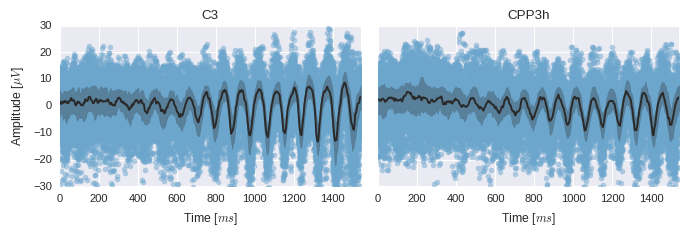

In [12]:
layer_ind = 22
filter_ind = 95
channels = ['C3','CPP3h']
sensor_inds = np.where(np.in1d(sensor_names,channels))[0]

X_RF = dp.load_RF_data(datapath,layer_ind,None,filter_ind)['X_RF_cropped']

f,axes = plt.subplots(ncols=2,nrows=1,sharey=True,sharex=True,figsize=(7,2.5))
axes = np.array(axes).flatten()
for i,sensor_ind in enumerate(sensor_inds):
    X_median = np.median(X_RF[:,sensor_ind],axis=0)
    p25 = np.percentile(X_RF[:,sensor_ind],25,axis=0)
    p75 = np.percentile(X_RF[:,sensor_ind],75,axis=0)

    plt.sca(axes[i])
    sns.tsplot(X_RF[:,sensor_ind,:],err_style='unit_points',color=['#6CA6CD'])
    plt.plot(X_median,color='#2a2a2a',zorder=101)
    plt.fill_between(np.arange(len(p25)), p25, p75,color='#2a2a2a',zorder=100,alpha=0.3)
    plt.ylim(-30,30)
    plt.title('%s'%channels[i])
    ticks = [0,50,100,150,200,250,300,350]
    plt.xticks(ticks,(np.array(ticks)/250.*1000).astype(int))
    if i%5==0:
        plt.ylabel('Amplitude [${\mu}V$]')
    plt.xlabel('Time [$ms$]')
plt.tight_layout()
plt.savefig('results_l8f95.png',bbox_inches='tight',pad_inches=0)
plt.show()

In [8]:
from braindecode.datasets.sensor_positions import tight_cap_positions
from braindecode.analysis.plot_util import plot_head_signals_tight
def plot_head_signals_tight_with_tube(signals, deviations,
    sensor_names=None, figsize=(12, 7),
        plot_args=None, hspace=0.35, sensor_map=tight_cap_positions,
        tsplot=False, color=None):
    if color is None:
        color = sns.color_palette()[0]
    fig = plot_head_signals_tight(signals, sensor_names, 
        figsize=figsize,plot_args=plot_args, hspace=hspace,
        sensor_map=sensor_map, tsplot=tsplot)
    for i, ax in enumerate(fig.axes):
        ax.fill_between(range(signals.shape[1]),
            deviations[0,i,:],  
            deviations[1,i,:],  
            alpha=0.3, color=color)
    return fig

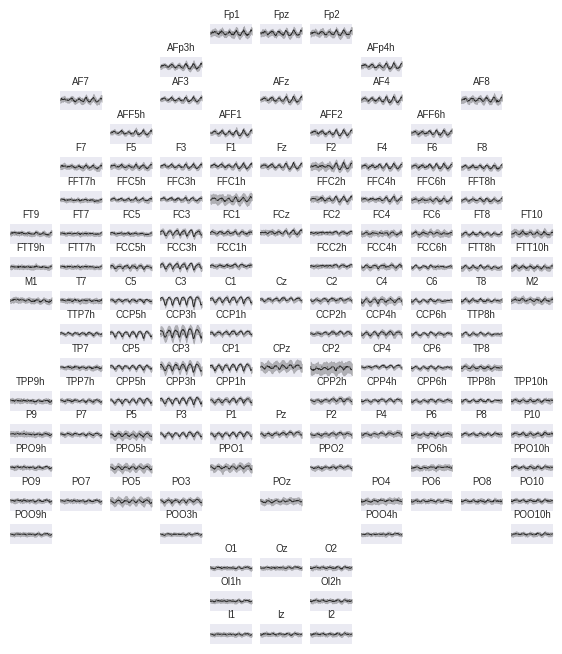

In [9]:
mpl.rcParams.update({'axes.titlesize' : 7})
layer_ind = 16
filter_ind = 11

X_RF = dp.load_RF_data(datapath,layer_ind,None,filter_ind)['X_RF_cropped']
medians = np.median(X_RF,axis=0)
deviations = np.percentile(X_RF,[25,75],axis=0)

plot_head_signals_tight_with_tube(medians,deviations,sensor_names=sensor_names,figsize=(7,8),hspace=0.7,color='#2a2a2a',plot_args={'linewidth':0.7,'color':'#2a2a2a'})
plt.savefig('appendix_l6f11.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

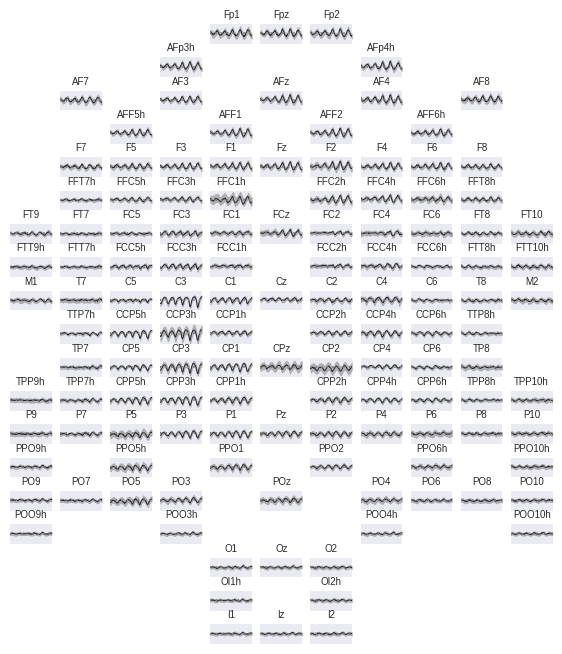

In [10]:
mpl.rcParams.update({'axes.titlesize' : 7})
layer_ind = 16
filter_ind = 77

X_RF = dp.load_RF_data(datapath,layer_ind,None,filter_ind)['X_RF_cropped']
medians = np.median(X_RF,axis=0)
deviations = np.percentile(X_RF,[25,75],axis=0)

plot_head_signals_tight_with_tube(medians,deviations,sensor_names=sensor_names,figsize=(7,8),hspace=0.7,color='#2a2a2a',plot_args={'linewidth':0.7,'color':'#2a2a2a'})
plt.savefig('appendix_l6f77.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

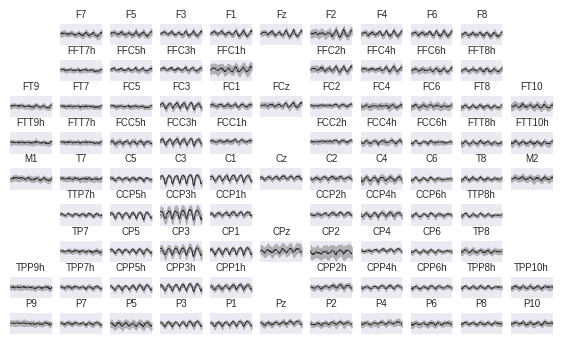

In [11]:
mpl.rcParams.update({'axes.titlesize' : 7})
layer_ind = 16
filter_ind = 11

X_RF = dp.load_RF_data(datapath,layer_ind,None,filter_ind)['X_RF_cropped']
medians = np.median(X_RF,axis=0)
deviations = np.percentile(X_RF,[25,75],axis=0)

plot_head_signals_tight_with_tube(medians[14:-27],deviations[:,14:-27],sensor_names=sensor_names[14:-27],figsize=(7,4),hspace=0.7,color='#2a2a2a',plot_args={'linewidth':0.7,'color':'#2a2a2a'})
plt.savefig('results_l6f11.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

In [13]:
layer_ind = 16
filter_inds = [11,77]

F_baseline = dp.load_baseline_feature_data(datapath,layer_ind)
F_F1 = dp.load_RF_feature_data(datapath,layer_ind,None,filter_inds[0])
F_F2 = dp.load_RF_feature_data(datapath,layer_ind,None,filter_inds[1])

KS1 = dp.load_KS_score_data(datapath,layer_ind,None,filter_inds[0])
KS2 = dp.load_KS_score_data(datapath,layer_ind,None,filter_inds[1])

In [14]:
F_baseline_f = ut.create_flattened_featurearr([F_baseline['features'][2]],shape=(F_baseline['features'][2].shape[0],-1))+0.5*np.pi
F_F1_f = ut.create_flattened_featurearr([F_F1['features'][2]],shape=(F_F1['features'][2].shape[0],-1))+0.5*np.pi
F_F2_f = ut.create_flattened_featurearr([F_F2['features'][2]],shape=(F_F2['features'][2].shape[0],-1))+0.5*np.pi

F_baseline_f[F_baseline_f>np.pi] -= 2*np.pi
F_F1_f[F_F1_f>np.pi] -= 2*np.pi
F_F2_f[F_F2_f>np.pi] -= 2*np.pi

max_KS1 = np.argsort(KS1['Phase']['KS_kuiper'])[::-1]
max_KS2 = np.argsort(KS2['Phase']['KS_kuiper'])[::-1]

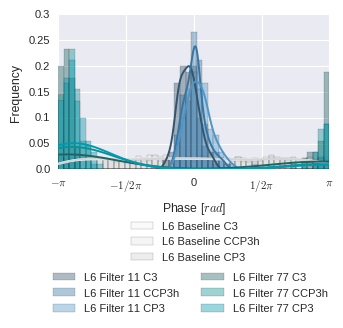

In [20]:
plt.figure(figsize=(3.5,2))
bins = np.linspace(-np.pi,np.pi,50)
colors1 = sns.color_palette('Greys',10)
colors2 = sns.color_palette('Blues_d',4)
colors3 = sns.color_palette('winter_d',4)

sns.distplot(F_baseline_f[:,max_KS1[0]],color=colors1[0],bins=bins,label='L6 Baseline C3')
sns.distplot(F_baseline_f[:,max_KS1[1]],color=colors1[1],bins=bins,label='L6 Baseline CCP3h')
sns.distplot(F_baseline_f[:,max_KS1[2]],color=colors1[2],bins=bins,label='L6 Baseline CP3')

sns.distplot(F_F1_f[:,max_KS1[0]],color=colors2[0],bins=bins,label='L6 Filter %d C3'%filter_inds[0])
sns.distplot(F_F1_f[:,max_KS1[1]],color=colors2[1],bins=bins,label='L6 Filter %d CCP3h'%filter_inds[0])
sns.distplot(F_F1_f[:,max_KS1[2]],color=colors2[2],bins=bins,label='L6 Filter %d CP3'%filter_inds[0])

sns.distplot(F_F2_f[:,max_KS1[0]],color=colors3[0],bins=bins,label='L6 Filter %d C3'%filter_inds[1])
sns.distplot(F_F2_f[:,max_KS1[1]],color=colors3[1],bins=bins,label='L6 Filter %d CCP3h'%filter_inds[1])
sns.distplot(F_F2_f[:,max_KS1[2]],color=colors3[2],bins=bins,label='L6 Filter %d CP3'%filter_inds[1])

plt.xlim(-np.pi,np.pi)
plt.xticks([-np.pi,-0.5*np.pi,0,0.5*np.pi,np.pi],['$-\pi$','$-1/2\pi$','0','$1/2\pi$','$\pi$'])
ticks = np.array([0,0.05,0.1,0.15,0.2,0.25,0.3])
plt.yticks(ticks/(bins[-1]-bins[-2]),ticks)
plt.ylim(0,0.3/(bins[-1]-bins[-2]))
plt.ylabel('Frequency')
plt.xlabel('Phase [$rad$]')

h,l = plt.gca().get_legend_handles_labels()
legend1 = plt.legend(h[:3], l[:3],bbox_to_anchor=[0.78, -0.27])
plt.legend(h[3:], l[3:],bbox_to_anchor=[1.03, -0.6],ncol=2)
plt.gca().add_artist(legend1)
plt.savefig('results_l6dist.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

In [35]:
layer_ind = 22
filter_inds = [8]

F_baseline = dp.load_baseline_feature_data(datapath,layer_ind)
F_F1 = dp.load_RF_feature_data(datapath,layer_ind,None,filter_inds[0])

KS1 = dp.load_KS_score_data(datapath,layer_ind,None,filter_inds[0])

In [36]:
F_baseline_f = ut.create_flattened_featurearr([F_baseline['features'][0]],shape=(F_baseline['features'][0].shape[0],-1))
F_F1_f = ut.create_flattened_featurearr([F_F1['features'][0]],shape=(F_F1['features'][0].shape[0],-1))

max_KS1 = np.argsort(KS1['FFT']['KS_kuiper'])[::-1]

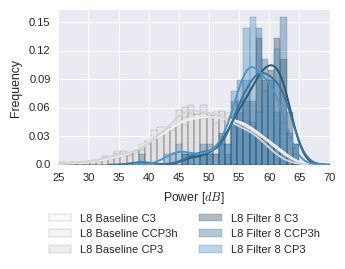

In [42]:
plt.figure(figsize=(3.5,2))
bins = np.linspace(20,70,50)
colors1 = sns.color_palette('Greys',10)
colors2 = sns.color_palette('Blues_d',4)
colors3 = sns.color_palette('winter_d',4)

sns.distplot(F_baseline_f[:,max_KS1[3]],color=colors1[0],bins=bins,label='L8 Baseline C3')
sns.distplot(F_baseline_f[:,max_KS1[0]],color=colors1[1],bins=bins,label='L8 Baseline CCP3h')
sns.distplot(F_baseline_f[:,max_KS1[2]],color=colors1[2],bins=bins,label='L8 Baseline CP3')

sns.distplot(F_F1_f[:,max_KS1[3]],color=colors2[0],bins=bins,label='L8 Filter %d C3'%filter_inds[0])
sns.distplot(F_F1_f[:,max_KS1[0]],color=colors2[1],bins=bins,label='L8 Filter %d CCP3h'%filter_inds[0])
sns.distplot(F_F1_f[:,max_KS1[2]],color=colors2[2],bins=bins,label='L8 Filter %d CP3'%filter_inds[0])

plt.xlim(25,70)
#plt.xticks([-np.pi,-0.5*np.pi,0,0.5*np.pi,np.pi],['$-\pi$','$-1/2\pi$','0','$1/2\pi$','$\pi$'])
ticks = np.array([0,0.03,0.06,0.09,0.12,0.15])
plt.yticks(ticks/(bins[-1]-bins[-2]),ticks)
plt.ylabel('Frequency')
plt.xlabel('Power [$dB$]')

plt.legend(bbox_to_anchor=[1, -0.25],ncol=2)
plt.savefig('results_l8dist.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

In [5]:
l1 = 16
l2 = 22

f1 = [11,77] # 63
f2 = [8]

X_RF1 = dp.load_RF_data(datapath,l1,None,f1[0])['X_RF_cropped']
X_RF2 = dp.load_RF_data(datapath,l1,None,f1[1])['X_RF_cropped']

In [6]:
a = anal.fit_sinusoid(signal=np.median(X_RF1[:,[55,65,73],:].mean(axis=1),axis=0),sampling_rate=250.)
b = anal.fit_sinusoid(signal=np.median(X_RF2[:,[55,65,73],:].mean(axis=1),axis=0),sampling_rate=250.)

[12.304743, 11.904761904761905, -1.5707237]
[18.657816, 11.904761904761905, 1.7543204]


In [20]:
phases = np.linspace(-np.pi,np.pi,20)
amplitudes = np.linspace(0,10,20)
inputs = np.zeros((60,128,1000,1),dtype=np.float32)
freq = 11.9
t = 2*np.pi*np.arange(1000)/250.

for i,p in enumerate(phases):
    inputs[i,[55,65,73],:,0] = amplitudes[19]*np.sin(freq*t+p)
for i,a in enumerate(amplitudes):
    inputs[20+i,[55,65,73],:,0] = a*np.sin(freq*t+phases[10])
for i,a in enumerate(amplitudes):
    inputs[40+i,[55,65,73],:,0] = a*np.sin(freq*t+phases[0])

In [21]:
outf1 = create_pred_fn(crf.convvisual.check_if_finalreshape_is_needed(model,l1)[0][-1])
outf2 = create_pred_fn(crf.convvisual.check_if_finalreshape_is_needed(model,l2)[0][-1])

out1 = outf1(inputs)
out2 = outf2(inputs)

/home/hartmank/braindecode/vienv/local/lib/python2.7/site-packages/lasagne/layers/pool.py:266: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode=self.mode,
/home/hartmank/braindecode/vienv/local/lib/python2.7/site-packages/lasagne/layers/pool.py:266: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode=self.mode,
/home/hartmank/braindecode/vienv/local/lib/python2.7/site-packages/lasagne/layers/pool.py:266: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode=self.mode,


In [22]:
out1_r = np.reshape(out1,(60,out1.shape[1],out1.shape[2]))
out2_r = np.reshape(out2,(60,out2.shape[1],out2.shape[2]))

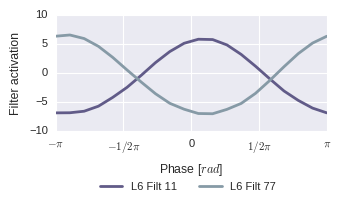

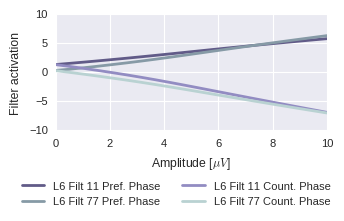

In [23]:
plt.figure(figsize=(3.5,1.5))
colors1 = sns.color_palette('Purples_d',2,desat=1)
colors2 = sns.color_palette('bone_r',4)
plt.plot(phases,out1_r[:20,f1[0],0],label='L6 Filt %d'%f1[0],color=colors1[0],linewidth=2)
plt.plot(phases,out1_r[:20,f1[1],0],label='L6 Filt %d'%f1[1],color=colors2[1],linewidth=2)
#plt.plot(phases,out1_r[0,f1[1],0],label='L6 Filt %d'%f1[1])
#plt.plot(phases,out1_r[:,-1,f1[1],0],label='L6 Filt %d'%f1[1])
plt.xlim(-np.pi,np.pi)
plt.xticks([-np.pi,-0.5*np.pi,0,0.5*np.pi,np.pi],['$-\pi$','$-1/2\pi$','0','$1/2\pi$','$\pi$'])
plt.legend()
plt.ylim(-10,10)
plt.ylabel('Filter activation')
plt.xlabel('Phase [$rad$]')
plt.legend(bbox_to_anchor=[0.85, -0.35],ncol=2)
plt.savefig('results_l6phase.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

plt.figure(figsize=(3.5,1.5))
plt.plot(amplitudes,out1_r[20:40,f1[0],0],label='L6 Filt %d Pref. Phase'%f1[0],color=colors1[0],linewidth=2)
plt.plot(amplitudes,out1_r[40:60,f1[1],0],label='L6 Filt %d Pref. Phase'%f1[1],color=colors2[1],linewidth=2)
plt.plot(amplitudes,out1_r[40:60,f1[0],0],label='L6 Filt %d Count. Phase'%f1[0],color=colors1[1],linewidth=2)
plt.plot(amplitudes,out1_r[20:40,f1[1],0],label='L6 Filt %d Count. Phase'%f1[1],color=colors2[0],linewidth=2)
#plt.plot(phases,out1_r[0,f1[1],0],label='L6 Filt %d'%f1[1])
#plt.plot(phases,out1_r[:,-1,f1[1],0],label='L6 Filt %d'%f1[1])
plt.legend()
plt.ylim(-10,10)
plt.xlim(amplitudes[0],amplitudes[-1])
plt.ylabel('Filter activation')
plt.xlabel('Amplitude [${\mu}V$]')
plt.legend(bbox_to_anchor=[1.05, -0.35],ncol=2)
plt.savefig('results_l6amp.pdf',bbox_inches='tight',pad_inches=0)
plt.show()


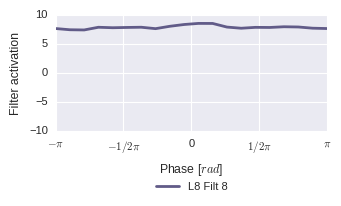

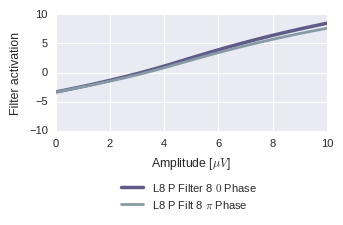

In [24]:
plt.figure(figsize=(3.5,1.5))
plt.plot(phases,out2_r[:20,f2[0],0],label='L8 Filt %d'%f2[0],color=colors1[0],linewidth=2)
#plt.plot(phases,out1_r[0,f1[1],0],label='L6 Filt %d'%f1[1])
#plt.plot(phases,out1_r[:,-1,f1[1],0],label='L6 Filt %d'%f1[1])
plt.xlim(-np.pi,np.pi)
plt.xticks([-np.pi,-0.5*np.pi,0,0.5*np.pi,np.pi],['$-\pi$','$-1/2\pi$','0','$1/2\pi$','$\pi$'])
plt.legend()
plt.ylim(-10,10)
plt.ylabel('Filter activation')
plt.xlabel('Phase [$rad$]')
plt.legend(bbox_to_anchor=[0.67, -0.35],ncol=2)
plt.savefig('results_l8phase.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

plt.figure(figsize=(3.5,1.5))
plt.plot(amplitudes,out2_r[20:40,f2[0],0],label='L8 P Filter %d $0$ Phase'%f2[0],color=colors1[0],linewidth=2.5)
plt.plot(amplitudes,out2_r[40:60,f2[0],0],label='L8 P Filt %d $\pi$ Phase'%f2[0],color=colors2[1],linewidth=2)
#plt.plot(phases,out1_r[0,f1[1],0],label='L6 Filt %d'%f1[1])
#plt.plot(phases,out1_r[:,-1,f1[1],0],label='L6 Filt %d'%f1[1])
plt.legend()
plt.ylim(-10,10)
plt.xlim(amplitudes[0],amplitudes[-1])
plt.ylabel('Filter activation')
plt.xlabel('Amplitude [${\mu}V$]')
plt.legend(bbox_to_anchor=[0.78, -0.35],ncol=1)
plt.savefig('results_l8amp.pdf',bbox_inches='tight',pad_inches=0)
plt.show()

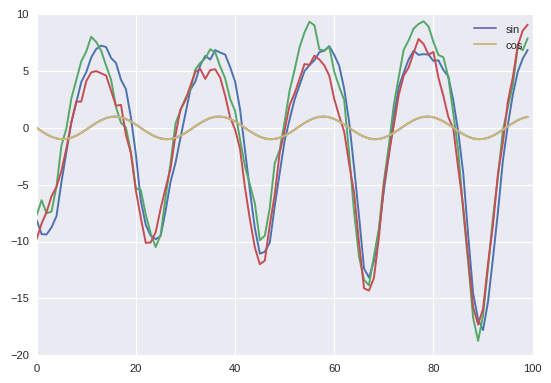

In [25]:
plt.plot(np.median(X_RF2[:,[55,65,73],:100],axis=0).T)
plt.plot(np.sin(freq*t[:100]+1*np.pi),label='sin')
plt.plot(np.cos(freq*t[:100]+0.5*np.pi),label='cos')
plt.legend()
plt.show()

In [26]:
sensor_names[[55,65,73]]

array(['C3', 'CCP3h', 'CP3'], 
      dtype='|S6')

In [27]:
np.angle(np.complex(0,1))

1.5707963267948966

In [28]:
-0.7*np.pi

-2.199114857512855

In [29]:
signal1 = np.cos(10*t)
signal2 = np.sin(10*t+0.5*np.pi)

In [30]:
fft1 = scipy.fftpack.fft(signal1)
fft2 = scipy.fftpack.fft(signal2)

In [31]:
freq1 = np.fft.fftfreq(len(signal1), d=1./250)
freq2 = np.fft.fftfreq(len(signal2), d=1./250)

In [32]:
print np.angle(fft1[40]),np.angle(fft2[40])

-4.10190597635e-15 -7.8838358383e-15


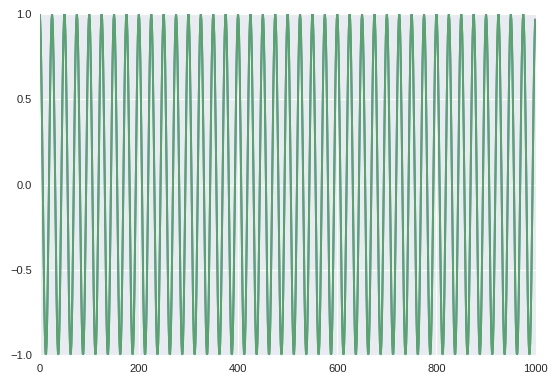

In [33]:
plt.plot(signal1)
plt.plot(signal2)
plt.show()

In [34]:
0.5*np.pi

1.5707963267948966

In [29]:
phases[[2,12]]

array([-2.48020473,  0.82673491])

In [26]:
1/4.*np.pi

0.7853981633974483

In [27]:
-np.pi+1/4.*np.pi

-2.356194490192345

In [98]:
amplitudes[19]

10.0

In [9]:
1.7543204+0.5*np.pi

3.3251167267948967